# HW 4 - Murat Teksin 504211325

In [311]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as ks


import matplotlib.pyplot as plt

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import chisquare
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding
from keras.utils import np_utils
import matplotlib.pyplot as plt
import time
from sklearn import tree
from sklearn.utils import shuffle
from keras.utils import to_categorical

# Q1

For this question we are going to use [1994 Census Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult).

Construct 

- Logistic regression
- SVM
- KNN
- Decision tree
- Gradient Boost (XGBoost)
- Neural network

models for the data. Cross-validate your models and measure the accuracies. Compare them putting the accuracies in a table.

In [312]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In this question only the numerical values is used.

In [314]:
x = data.iloc[:,[2,4,10,11,12]]

In [315]:
def helper(x):
    if ('<=' in x):
        return 0
    else:
        return 1
    
y = [helper(x) for x in data.iloc[:,14]]

#  Data Splitting

In [316]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression 

In [317]:
start=time.time()
LoR_model = LogisticRegression().fit(x_train,y_train)
LoR_predicted = LoR_model.predict(x_test)
end=time.time()
LoR_time = (end-start)

In [318]:
LoR_cm=confusion_matrix(y_test,LoR_predicted)
ch_LoR = chisquare(LoR_cm,axis=None)
accuracy_score(y_test,LoR_predicted)

0.7988638108398587

We have %80 Accurracy. It goes white when the accuracy going up. So model can't divide the second class from first class.

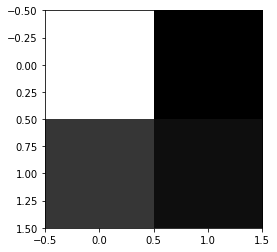

In [319]:
plt.imshow(LoR_cm,cmap='gray')

# SVC

In [320]:
start=time.time()

SVC_Model = SVC(C=2.0,
                kernel='rbf',
                max_iter=10000).fit(x_train,y_train)
SVC_Predict = SVC_Model.predict(x_test)
end=time.time()
SVC_time = (end-start)

In [321]:
SVC_cm = confusion_matrix(y_test,SVC_Predict)
accuracy_score(y_test,SVC_Predict)

0.800706279748196

In [322]:
ch_SVC = chisquare(SVC_cm,axis=None)

SVC also gives the  nearly same accuracy score with Logistic Regression.

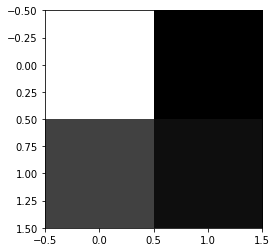

In [323]:
plt.imshow(SVC_cm,cmap ='gray')

# KNN 

In [324]:
start=time.time()
KNN_Model = KNeighborsClassifier().fit(x_train,y_train)
KNN_Predict = KNN_Model.predict(x_test)
end=time.time()
KNN_time = (end-start)

In [325]:
KNN_cm = confusion_matrix(y_test,KNN_Predict)
ch_KNN = chisquare(KNN_cm,axis=None)
accuracy_score(y_test,KNN_Predict)

0.7795178873023184

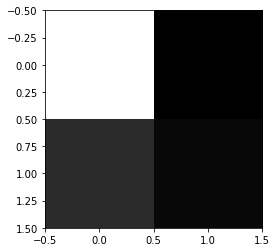

In [326]:
plt.imshow(KNN_cm,cmap='gray')

# DecisionTreeClassifier 

In [327]:
classifier = DecisionTreeClassifier(max_depth=4, criterion='entropy')
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.8234300629510211

In [328]:
y_test_predict = classifier.predict(x_test)
cm_Tree = confusion_matrix(y_test, y_test_predict)
ch_Tree = chisquare(y_test_predict,axis=None)

[Text(1893.2142857142858, 3261.6, 'X[2] <= 5119.0\nentropy = 0.796\nsamples = 26048\nvalue = [19778, 6270]'),
 Text(1062.857142857143, 2536.8, 'X[1] <= 12.5\nentropy = 0.732\nsamples = 24794\nvalue = [19712, 5082]'),
 Text(531.4285714285714, 1812.0, 'X[4] <= 39.5\nentropy = 0.583\nsamples = 19050\nvalue = [16389, 2661]'),
 Text(265.7142857142857, 1087.2000000000003, 'X[3] <= 1820.5\nentropy = 0.267\nsamples = 5109\nvalue = [4876, 233]'),
 Text(132.85714285714286, 362.4000000000001, 'entropy = 0.25\nsamples = 5062\nvalue = [4851, 211]'),
 Text(398.57142857142856, 362.4000000000001, 'entropy = 0.997\nsamples = 47\nvalue = [25, 22]'),
 Text(797.1428571428571, 1087.2000000000003, 'X[3] <= 1820.5\nentropy = 0.667\nsamples = 13941\nvalue = [11513, 2428]'),
 Text(664.2857142857143, 362.4000000000001, 'entropy = 0.642\nsamples = 13583\nvalue = [11365, 2218]'),
 Text(930.0, 362.4000000000001, 'entropy = 0.978\nsamples = 358\nvalue = [148, 210]'),
 Text(1594.2857142857142, 1812.0, 'X[3] <= 1881.

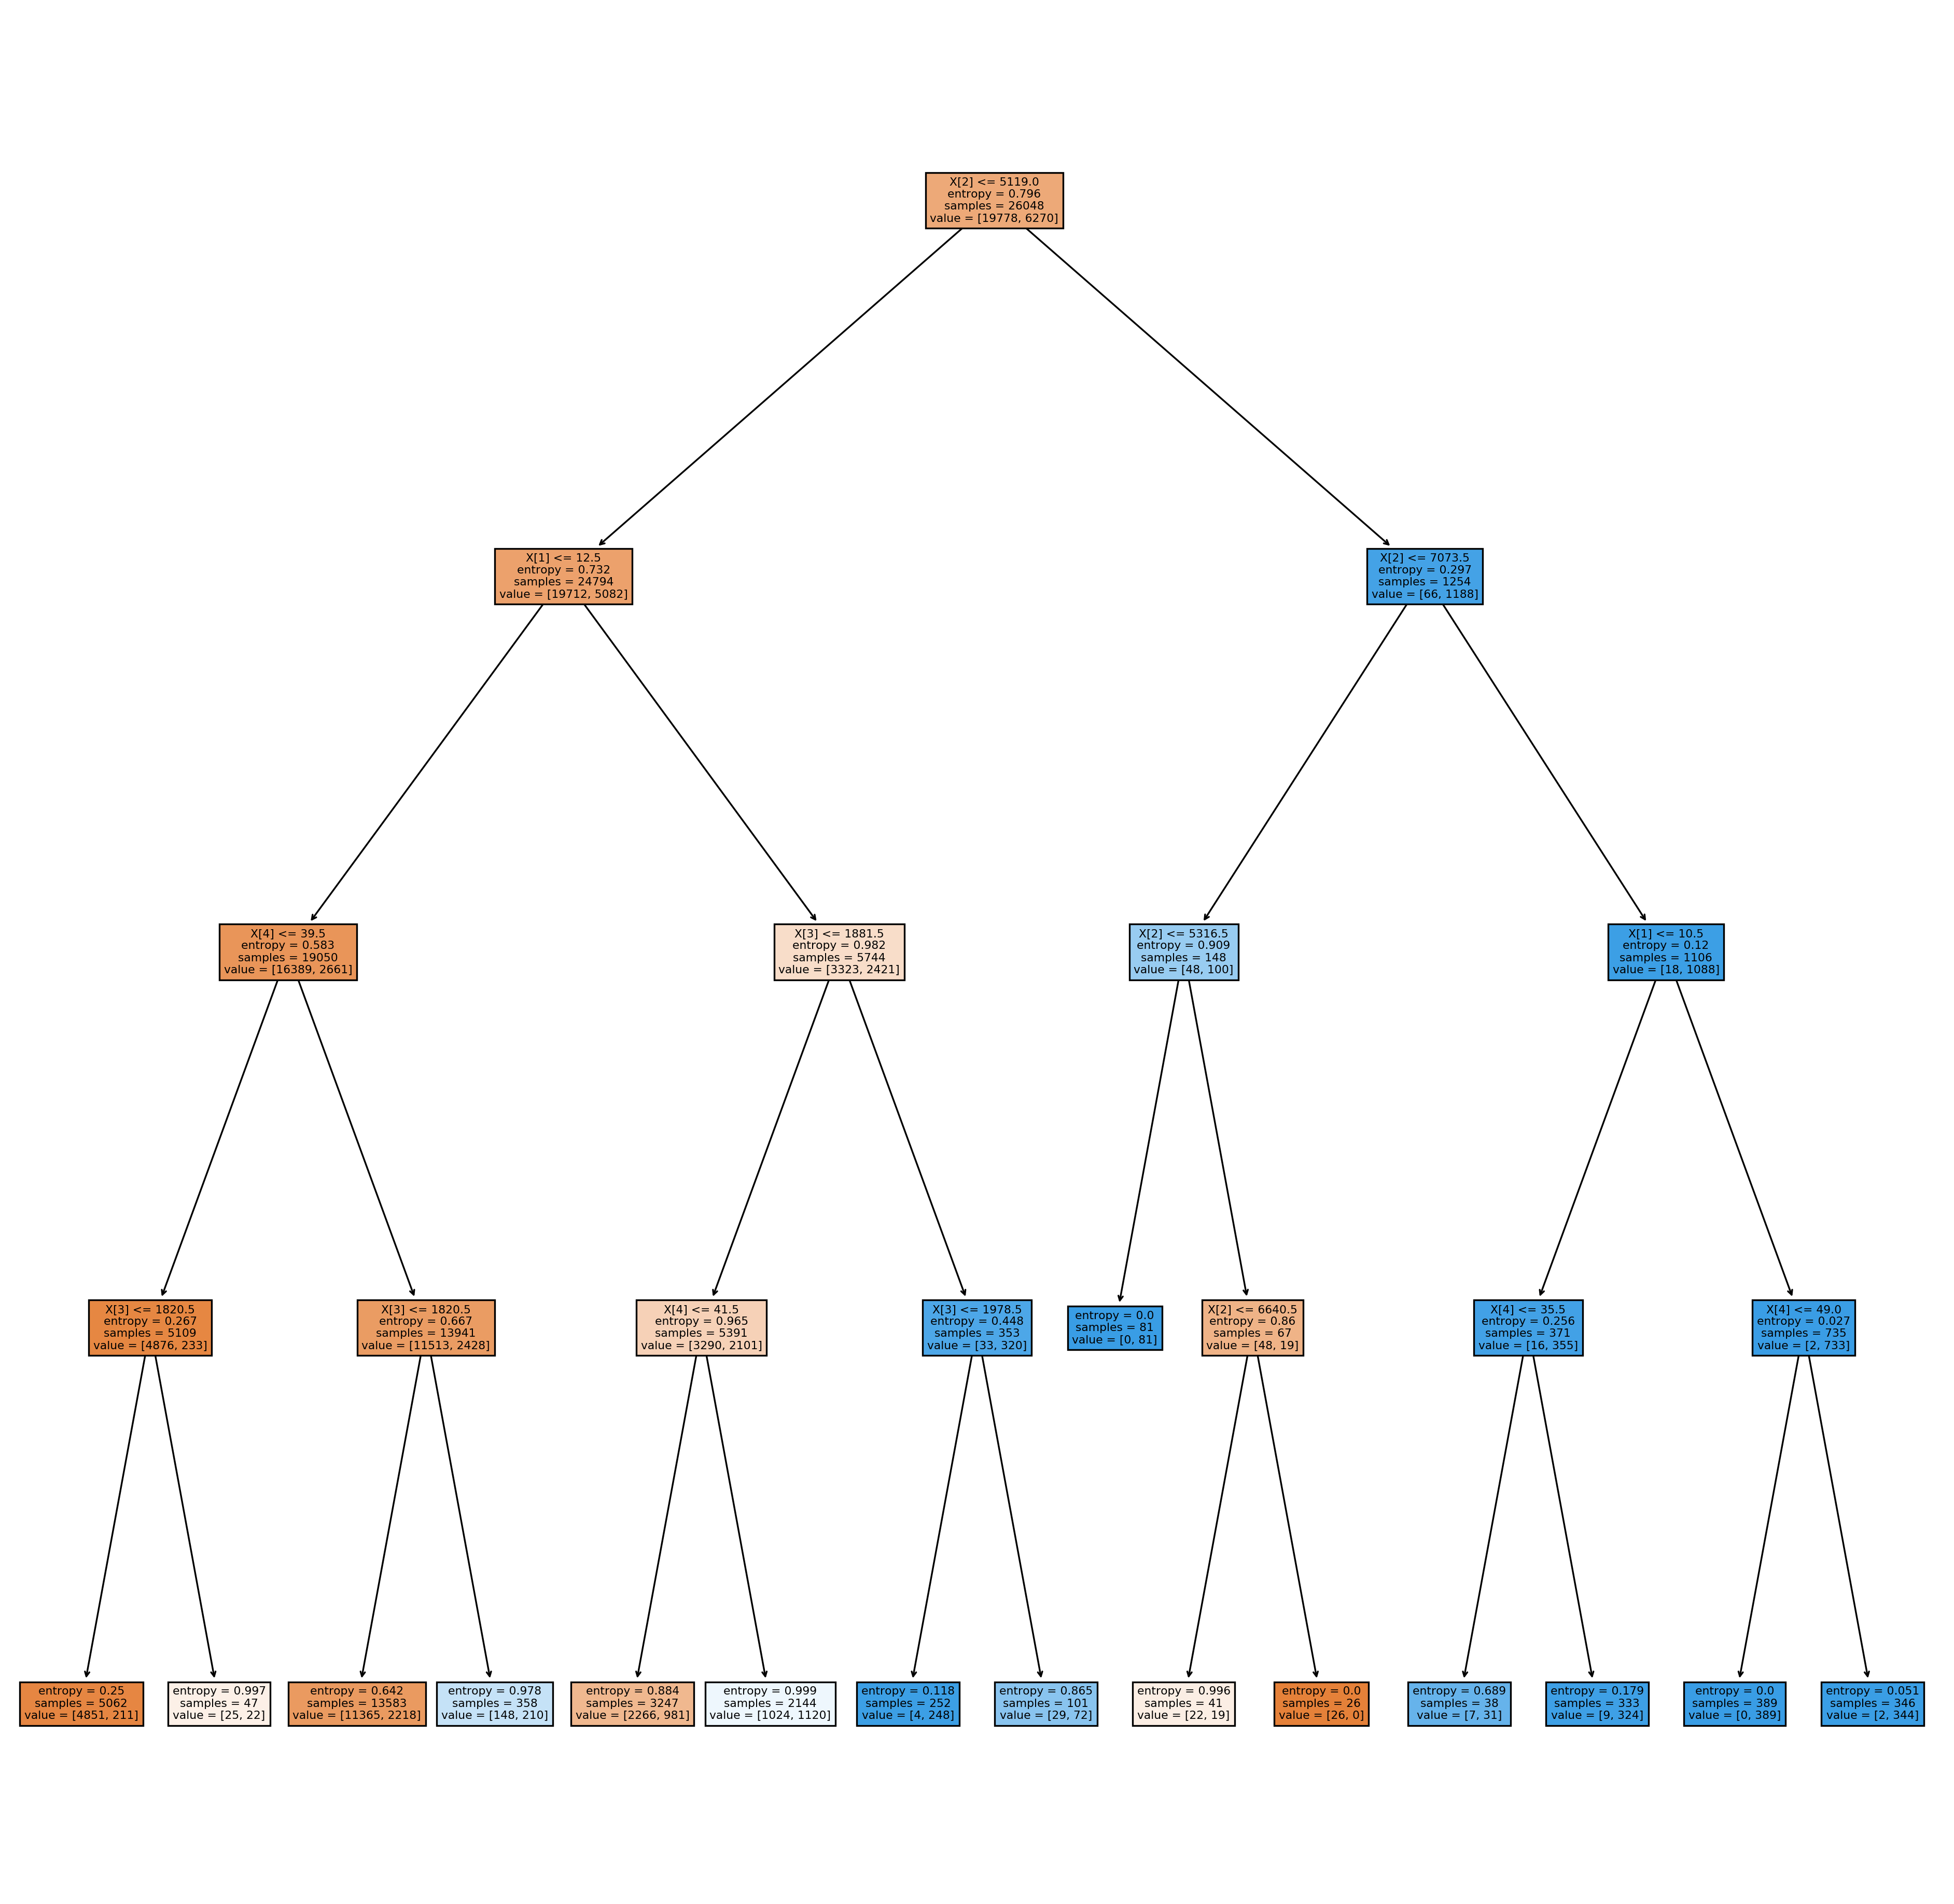

In [329]:
plt.figure(figsize=(20,20), dpi=240)
tree.plot_tree(classifier,
               filled = True)

We can make %82 accuracy score with deciding max depth to be 4.

# XGBoost 

In [330]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(x_train,y_train)

In [331]:
xgb_pred= xgb.predict(x_test)

In [332]:
XGB_cm = confusion_matrix(y_test,xgb_pred)
ch_XGB= chisquare(xgb_pred,axis=None)
accuracy_score(y_test,xgb_pred)

0.8404729003531399

We can reach % 84 accuracy with XGB and second class is more findable now.

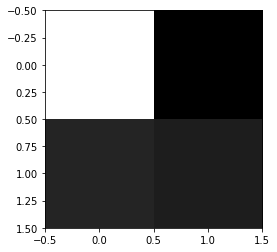

In [333]:
plt.imshow(XGB_cm,cmap='gray')

# Neural Network 

In [334]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [337]:
ann_model = Sequential()
ann_model.add(Dense(5,activation='relu'))
ann_model.add(Dense(20,activation='relu'))
ann_model.add(Dense(30,activation='relu'))
ann_model.add(Dense(20,activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))
ann_model.compile(optimizer='adam',loss='binary_crossentropy')

In [338]:
ann_model.fit(x_train.values,np.array(y_train),epochs=100,batch_size=128,validation_data=(x_test.values,np.array(y_test)))

Train on 26048 samples, validate on 6513 samples
Epoch 1/100
26048/26048 [==============================] - 1s 37us/sample - loss: 258.8793 - val_loss: 15.7597
Epoch 2/100
26048/26048 [==============================] - 0s 14us/sample - loss: 28.3133 - val_loss: 10.2803
Epoch 3/100
26048/26048 [==============================] - 0s 18us/sample - loss: 29.3160 - val_loss: 8.8647
Epoch 4/100
26048/26048 [==============================] - 0s 19us/sample - loss: 23.2325 - val_loss: 37.2887
Epoch 5/100
26048/26048 [==============================] - 0s 16us/sample - loss: 22.8994 - val_loss: 31.5430
Epoch 6/100
26048/26048 [==============================] - 0s 18us/sample - loss: 20.6190 - val_loss: 56.4126
Epoch 7/100
26048/26048 [==============================] - 0s 14us/sample - loss: 24.4234 - val_loss: 14.1473
Epoch 8/100
26048/26048 [==============================] - 0s 13us/sample - loss: 19.6130 - val_loss: 15.8846
Epoch 9/100
26048/26048 [==============================] - 0s 14us/samp

In [339]:
ann_predictions = ann_model.predict_classes(x_test.values)

In [340]:
print(confusion_matrix(y_test,ann_predictions))

[[4848   94]
 [1186  385]]


In [341]:
accuracy_score(y_test,ann_predictions)

0.8034699831107017

In [342]:
losses = pd.DataFrame(ann_model.history.history)

We can observe that train and validation loss decreasing with every epoch. So if training continue then the accuracy will be higher. With paramaters we can reach %80 accuracy. 

In [343]:
ch_ann = chisquare(ann_predictions,axis=None)

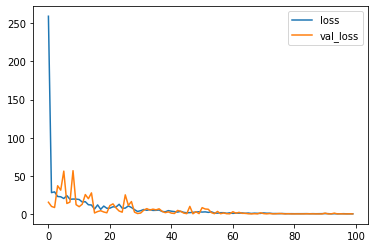

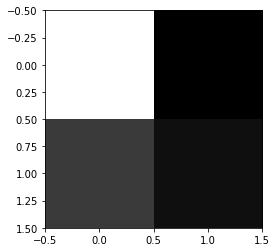

In [344]:
losses.plot()
plt.figure()
plt.imshow(confusion_matrix(y_test,ann_predictions),cmap='gray')

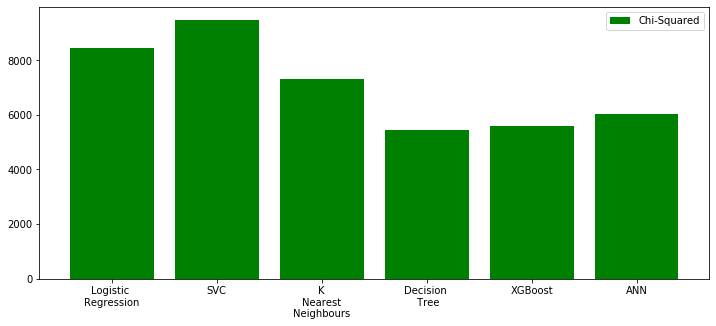

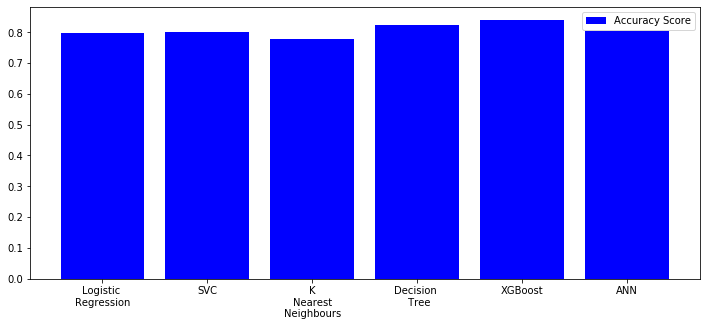

In [345]:
compare_arr_sup = np.array([ch_LoR[0],ch_SVC[0],ch_KNN[0],ch_Tree[0],ch_XGB[0],ch_ann[0]])
plt.figure(figsize=(12,5))
plt.bar(['Logistic \nRegression','SVC','K\nNearest\nNeighbours','Decision \n Tree','XGBoost','ANN'],compare_arr_sup,color='g',label='Chi-Squared')
plt.legend()

compare_acc_sup = np.array([accuracy_score(y_test,LoR_predicted),accuracy_score(y_test,SVC_Predict),accuracy_score(y_test,KNN_Predict),
                            classifier.score(x_test,y_test),accuracy_score(y_test,xgb_pred),accuracy_score(y_test,ann_predictions)])
plt.figure(figsize=(12,5))
plt.bar(['Logistic \nRegression','SVC','K\nNearest\nNeighbours','Decision \n Tree','XGBoost','ANN'],compare_acc_sup,color='b',label='Accuracy Score')
plt.legend()

So finally when we look chisquares, we can obtain simple models gives better scores in this database.

# Q2

For this question we are going to use [the Dry Bean Dataset](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset):

Construct 

- Logistic regression
- SVM
- KNN
- Decision tree
- Gradient Boost (XGBoost)
- Neural network

models for the data. Cross-validate your models and measure the accuracies. Compare them putting the accuracies in a table.

In [79]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    data = pd.read_excel(zf.open('DryBeanDataset/Dry_Bean_Dataset.xlsx'))
    
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


First Data is divided inputs and outputs.

In [82]:
x = data.iloc[:,:-1]

Data has 7 classes. We can obtain classes with fuction which is below.

In [83]:
def helper(x):
    if ('SEKER' in x):
        return 0 
    elif ('BARBUNYA' in x):
        return 1
    elif ('BOMBAY' in x):
        return 2
    elif ('CALI' in x):
        return 3
    elif ('DERMASON' in x):
        return 4
    elif ('HOROZ' in x):
        return 5
    elif ('SIRA' in x):
        return 6
y = [helper(x) for x in data.iloc[:,16]]
y= np.array(y).astype('int')


Data is divided train and test parts.

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#  Logistic Regression

In [86]:
start=time.time()
LoR_model = LogisticRegression().fit(x_train,y_train)
LoR_predicted = LoR_model.predict(x_test)
end=time.time()
LoR_time = (end-start)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
LoR_cm=confusion_matrix(y_test,LoR_predicted)
ch_LoR = chisquare(LoR_cm,axis=None)
accuracy_score(y_test,LoR_predicted)

0.6856408373117885

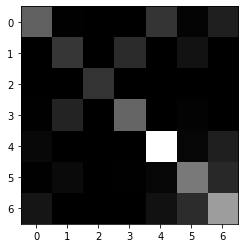

In [88]:
plt.imshow(LoR_cm,cmap='gray')

# SVC 

In [91]:
start=time.time()

SVC_Model = SVC(C=2.0,
                max_iter=10000).fit(x_train,y_train)
SVC_Predict = SVC_Model.predict(x_test)
end=time.time()
SVC_time = (end-start)

In [92]:
SVC_cm = confusion_matrix(y_test,SVC_Predict)
accuracy_score(y_test,SVC_Predict)

0.628718325376423

In [95]:
ch_SVC = chisquare(SVC_cm,axis=None)

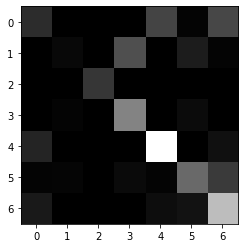

In [96]:
plt.imshow(SVC_cm,cmap ='gray')

# KNN Model

In [99]:
start=time.time()
KNN_Model = KNeighborsClassifier().fit(x_train,y_train)
KNN_Predict = KNN_Model.predict(x_test)
end=time.time()
KNN_time = (end-start)

In [100]:
KNN_cm = confusion_matrix(y_test,KNN_Predict)
ch_KNN = chisquare(KNN_cm,axis=None)
accuracy_score(y_test,KNN_Predict)

0.7194271024605214

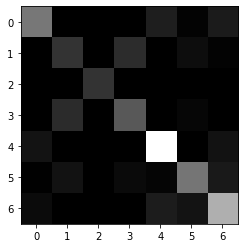

In [101]:
plt.imshow(KNN_cm,cmap='gray')

# Decision Tree

In [103]:
classifier = DecisionTreeClassifier(max_depth=4, criterion='entropy')
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.8604480352552332

In [105]:
y_test_predict = classifier.predict(x_test)
cm_Tree = confusion_matrix(y_test, y_test_predict)
ch_Tree = chisquare(y_test_predict,axis=None)

[Text(1860.0, 3261.6, 'X[2] <= 327.969\nentropy = 2.642\nsamples = 10888\nvalue = [1614, 1061, 405, 1313, 2875, 1520, 2100]'),
 Text(930.0, 2536.8, 'X[3] <= 183.493\nentropy = 1.74\nsamples = 6624\nvalue = [1611, 101, 0, 6, 2875, 117, 1914]'),
 Text(465.0, 1812.0, 'X[1] <= 704.897\nentropy = 0.841\nsamples = 3218\nvalue = [28, 1, 0, 0, 2656, 106, 427]'),
 Text(232.5, 1087.2000000000003, 'X[12] <= 0.007\nentropy = 0.195\nsamples = 2232\nvalue = [25, 0, 0, 0, 2178, 3, 26]'),
 Text(116.25, 362.4000000000001, 'entropy = 1.159\nsamples = 50\nvalue = [18, 0, 0, 0, 30, 0, 2]'),
 Text(348.75, 362.4000000000001, 'entropy = 0.134\nsamples = 2182\nvalue = [7, 0, 0, 0, 2148, 3, 24]'),
 Text(697.5, 1087.2000000000003, 'X[11] <= 0.743\nentropy = 1.41\nsamples = 986\nvalue = [3, 1, 0, 0, 478, 103, 401]'),
 Text(581.25, 362.4000000000001, 'entropy = 0.641\nsamples = 92\nvalue = [0, 0, 0, 0, 4, 81, 7]'),
 Text(813.75, 362.4000000000001, 'entropy = 1.176\nsamples = 894\nvalue = [3, 1, 0, 0, 474, 22, 394

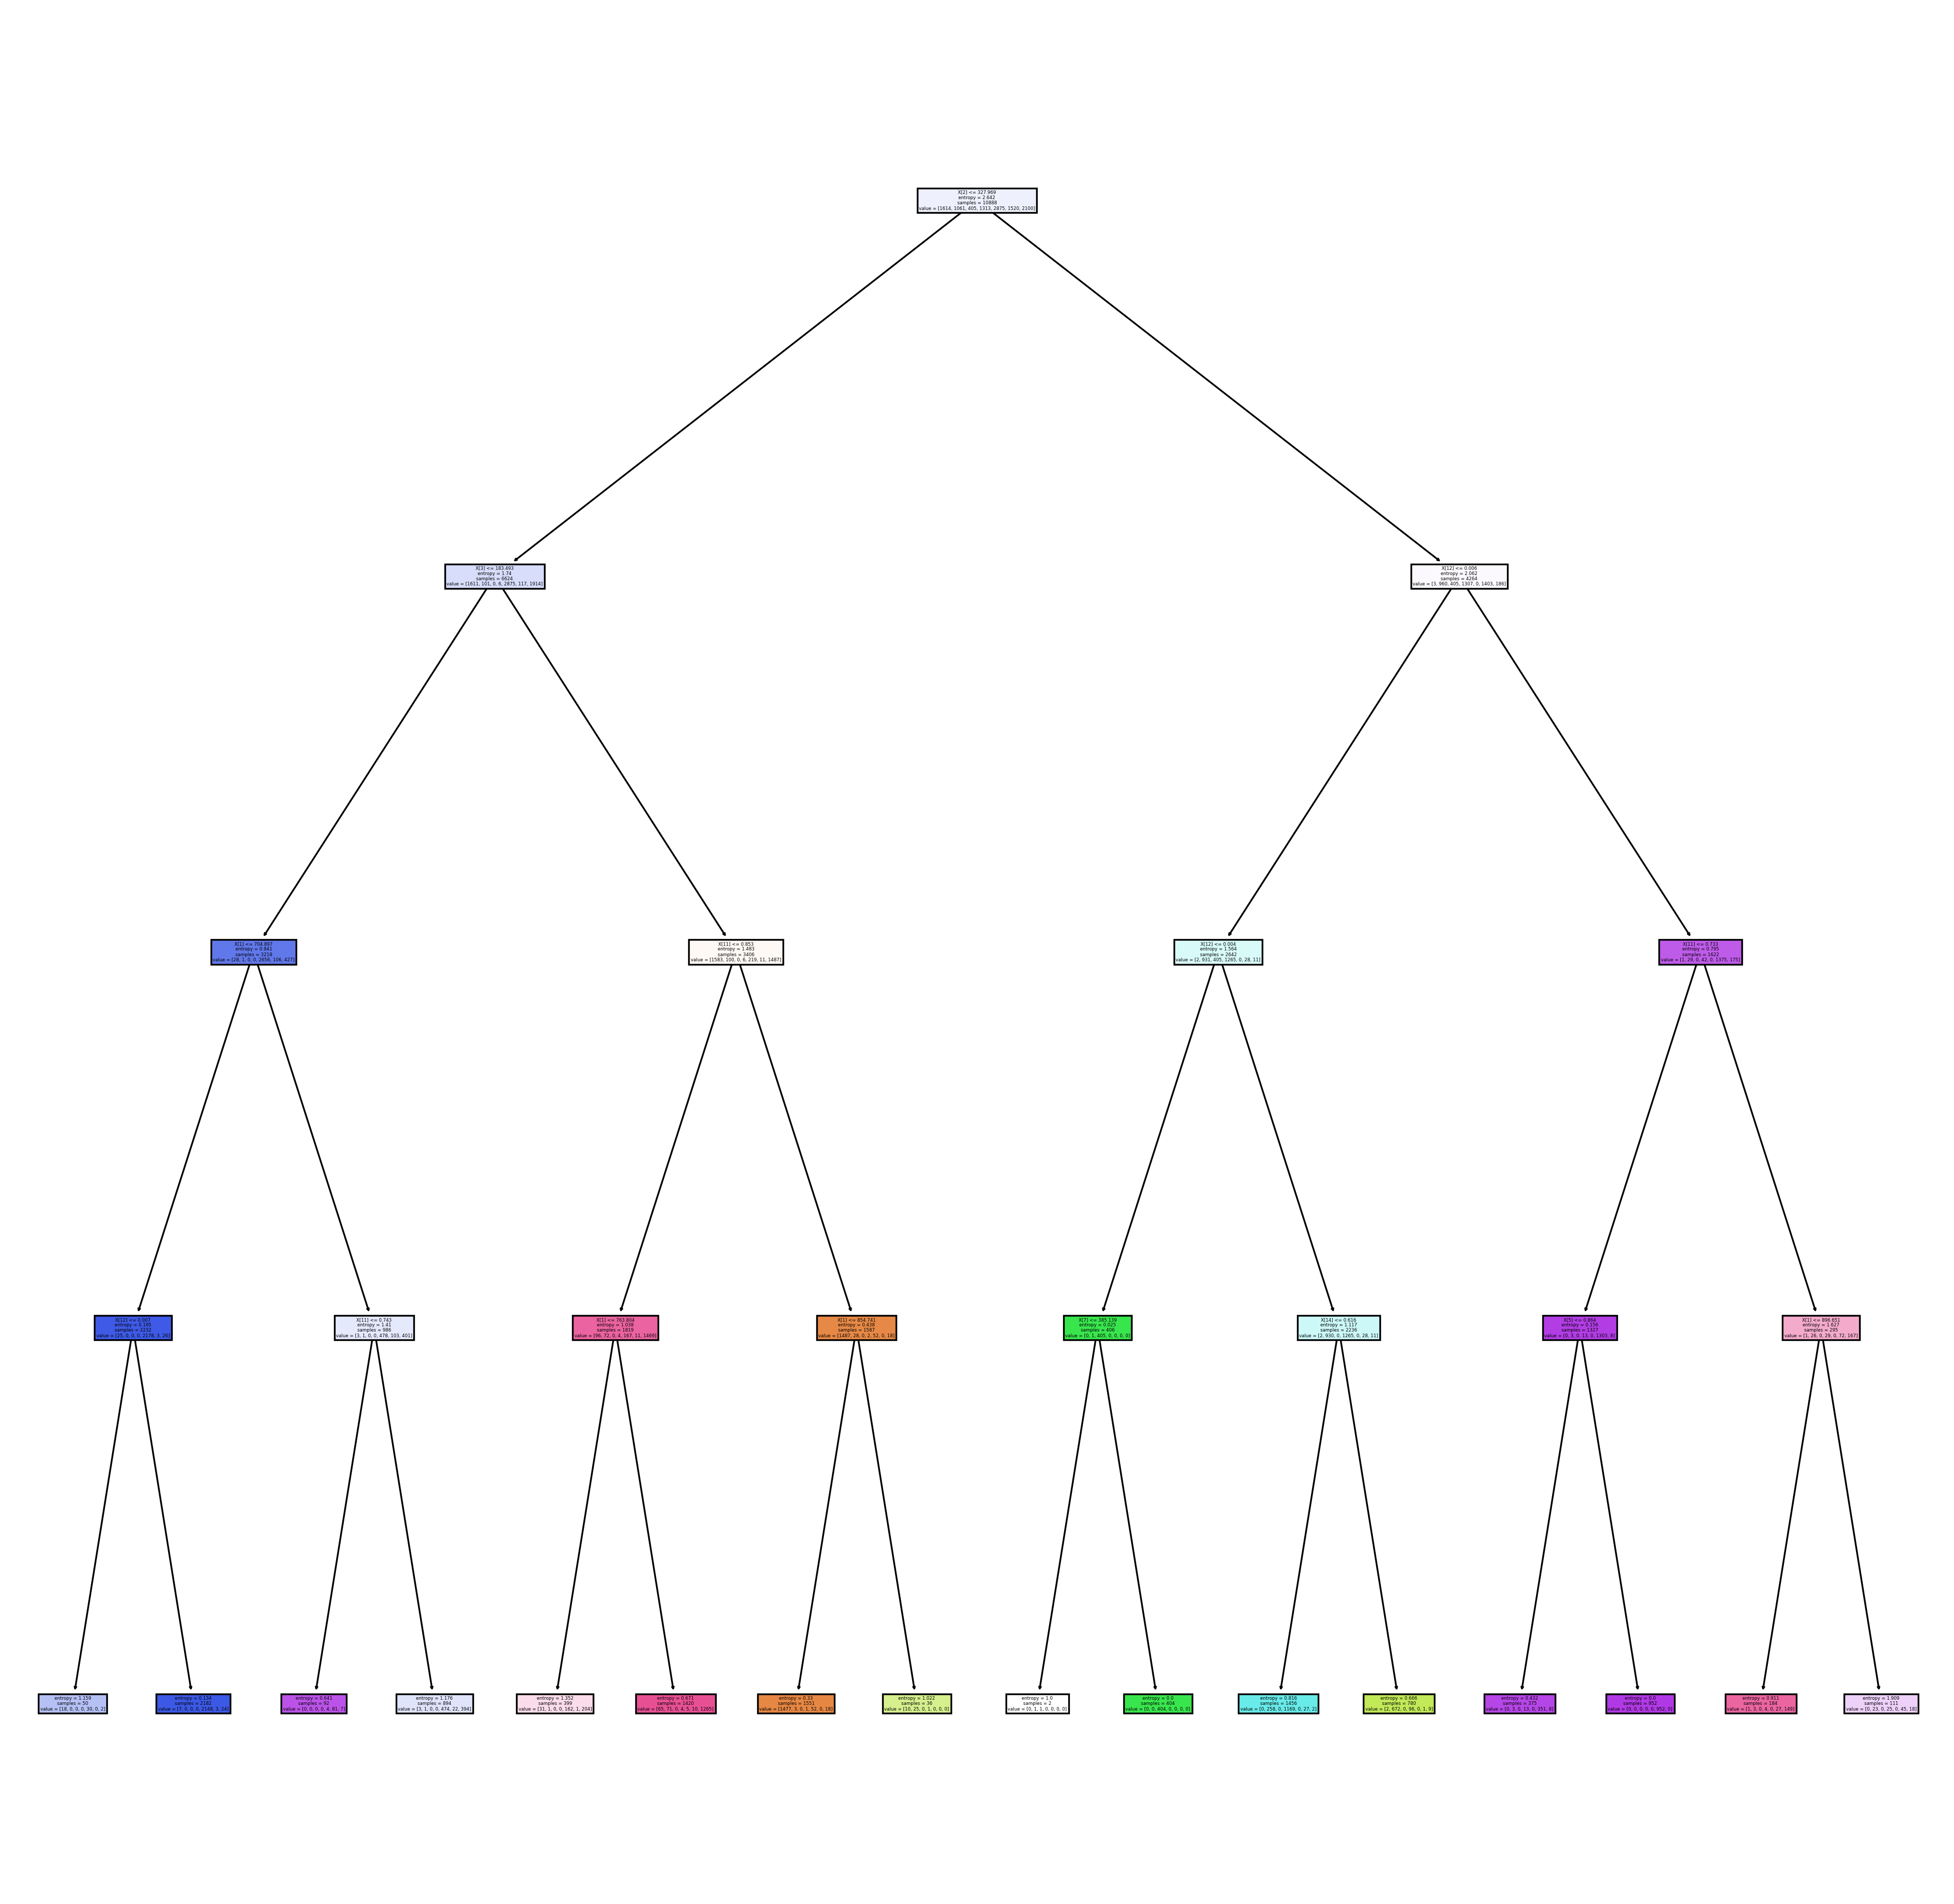

In [104]:
plt.figure(figsize=(20,20), dpi=240)
tree.plot_tree(classifier,
               filled = True)

#  XGBoost

In [111]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(x_train,y_train)
xgb_pred= xgb.predict(x_test)

In [112]:
XGB_cm = confusion_matrix(y_test,xgb_pred)
ch_XGB= chisquare(xgb_pred,axis=None)
accuracy_score(y_test,xgb_pred)

0.9250826294528094

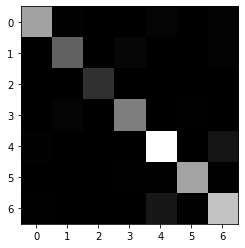

In [113]:
plt.imshow(XGB_cm,cmap='gray')

XGBoost Gives high accuracy.

# ANN

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [220]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [219]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [238]:
ann_model = Sequential()
ann_model.add(Dense(32,input_dim=16,activation='relu'))
ann_model.add(Dense(64,activation='relu'))
ann_model.add(Dense(32,activation='relu'))
ann_model.add(Dense(7,activation='softmax'))
ann_model.compile(optimizer='adam',loss='categorical_crossentropy')

In [240]:
ann_model.fit(x_train.values,np.array(y_train_cat),epochs=100,validation_data=(x_test.values,np.array(y_test_cat)))

Train on 10888 samples, validate on 2723 samples
Epoch 1/100
10888/10888 [==============================] - 1s 54us/sample - loss: 10.4814 - val_loss: 12.2425
Epoch 2/100
10888/10888 [==============================] - 1s 56us/sample - loss: 10.0949 - val_loss: 14.2390
Epoch 3/100
10888/10888 [==============================] - 1s 60us/sample - loss: 6.9605 - val_loss: 2.7967
Epoch 4/100
10888/10888 [==============================] - 1s 56us/sample - loss: 7.8765 - val_loss: 5.6942
Epoch 5/100
10888/10888 [==============================] - 1s 56us/sample - loss: 6.3197 - val_loss: 3.1719
Epoch 6/100
10888/10888 [==============================] - 1s 57us/sample - loss: 5.9615 - val_loss: 5.3328
Epoch 7/100
10888/10888 [==============================] - 1s 56us/sample - loss: 5.9432 - val_loss: 3.4302
Epoch 8/100
10888/10888 [==============================] - 1s 57us/sample - loss: 5.4023 - val_loss: 3.5229
Epoch 9/100
10888/10888 [==============================] - 1s 57us/sample - loss: 6

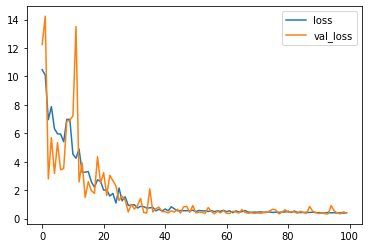

In [241]:
model_loss = pd.DataFrame(ann_model.history.history)
model_loss.plot()

In [242]:
ann_predictions = ann_model.predict_classes(x_test.values)

In [243]:
print(confusion_matrix(y_test,ann_predictions))

[[330   4   0   0  34   0  45]
 [  0  97   0 145   0   3  16]
 [  0   0 117   0   0   0   0]
 [  0   2   0 302   0  12   1]
 [  1   0   0   0 588   5  77]
 [  0   0   0   3   3 399   3]
 [  0   0   0   0  42  37 457]]


In [246]:
ch_ANN = chisquare(ann_predictions,axis=None)
accuracy_score(y_test,ann_predictions)

0.8409842085934631

ANN Model gives %84 accuracy. With its cost it doesn't win the model race in this dataset.

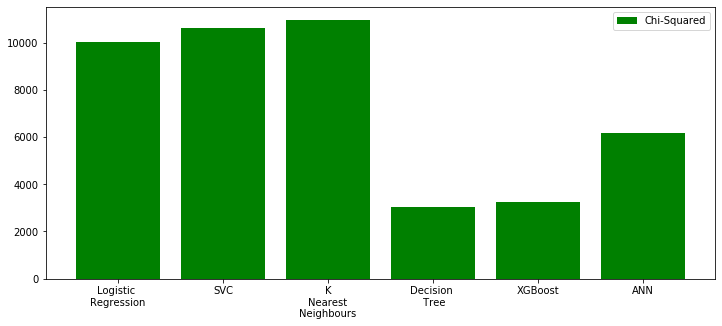

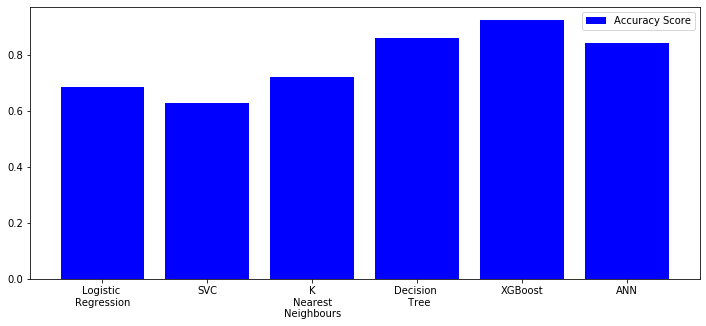

In [249]:
compare_arr_sup = np.array([ch_LoR[0],ch_SVC[0],ch_KNN[0],ch_Tree[0],ch_XGB[0],ch_ann[0]])
plt.figure(figsize=(12,5))
plt.bar(['Logistic \nRegression','SVC','K\nNearest\nNeighbours','Decision \n Tree','XGBoost','ANN'],compare_arr_sup,color='g',label='Chi-Squared')
plt.legend()

compare_acc_sup = np.array([accuracy_score(y_test,LoR_predicted),accuracy_score(y_test,SVC_Predict),accuracy_score(y_test,KNN_Predict),
                            classifier.score(x_test,y_test),accuracy_score(y_test,xgb_pred),accuracy_score(y_test,ann_predictions)])
plt.figure(figsize=(12,5))
plt.bar(['Logistic \nRegression','SVC','K\nNearest\nNeighbours','Decision \n Tree','XGBoost','ANN'],compare_acc_sup,color='b',label='Accuracy Score')
plt.legend()

# Q3

For this question we are going to use the [Japanese MNIST](https://github.com/rois-codh/kmnist) dataset.

Construct a convolutional neural network model for the dataset and cross-validate your model.

In [294]:
train_x = np.load("./kmnist-train-imgs.npz")['arr_0'].reshape(60000,28,28,1)
train_y = np.load("./kmnist-train-labels.npz")['arr_0']
test_x = np.load("./kmnist-test-imgs.npz")['arr_0'].reshape(10000,28,28,1)
test_y = np.load("./kmnist-test-labels.npz")['arr_0']

In [295]:
train_y = to_categorical(train_y,10)

In [296]:
train_img, train_lbl = shuffle(train_x, train_y, random_state = 0)

In [297]:
train_imgs = train_img[:50000]
train_lbls = train_lbl[:50000]
valid_imgs = train_img[50000:]
valid_lbls = train_lbl[50000:]

# One of the train set image 

Text(0.5, 1.0, 'The label of the image: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

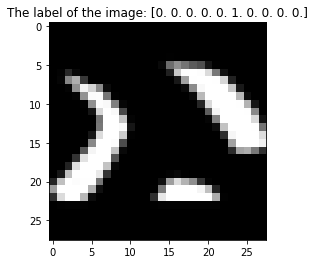

In [298]:
plt.imshow(train_x[10,:,:,0],cmap='gray')
plt.title('The label of the image: '+str(train_y[10]))

# Model Construction 

In [299]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [300]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#Output Layer
# multi class
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [301]:
model.fit(train_imgs,train_lbls,epochs=10,batch_size=250,validation_data=(valid_imgs,valid_lbls))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 292us/sample - loss: 3.5282 - accuracy: 0.6617 - val_loss: 0.7405 - val_accuracy: 0.7968
Epoch 2/10
50000/50000 [==============================] - 15s 301us/sample - loss: 0.4577 - accuracy: 0.8627 - val_loss: 0.3347 - val_accuracy: 0.8996
Epoch 3/10
50000/50000 [==============================] - 17s 336us/sample - loss: 0.2241 - accuracy: 0.9331 - val_loss: 0.2288 - val_accuracy: 0.9345
Epoch 4/10
50000/50000 [==============================] - 15s 295us/sample - loss: 0.1350 - accuracy: 0.9593 - val_loss: 0.1908 - val_accuracy: 0.9460
Epoch 5/10
50000/50000 [==============================] - 15s 297us/sample - loss: 0.0947 - accuracy: 0.9700 - val_loss: 0.1877 - val_accuracy: 0.9500
Epoch 6/10
50000/50000 [==============================] - 15s 291us/sample - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.1771 - val_accuracy: 0.9539
Epoch 7/10
50000/50000 [====================

In [302]:
metrics = pd.DataFrame(model.history.history)

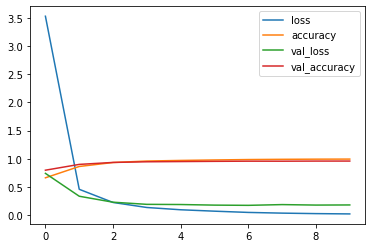

In [303]:
metrics.plot()

We can obtain accuracy is high enough for train and validation.

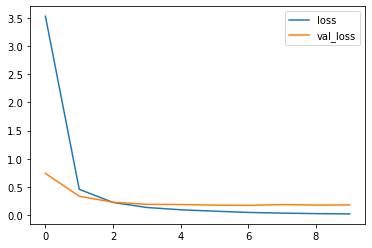

In [304]:
metrics[['loss','val_loss']].plot()

In [305]:
test_y_cat = to_categorical(test_y,10)

In [306]:
model.evaluate(test_x,test_y_cat,verbose=0)

[0.5437718232780695, 0.9006]

In [307]:
predictions = model.predict_classes(test_x)

In [308]:
from sklearn.metrics import classification_report
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1000
           1       0.95      0.89      0.92      1000
           2       0.90      0.84      0.87      1000
           3       0.91      0.92      0.92      1000
           4       0.89      0.85      0.87      1000
           5       0.89      0.89      0.89      1000
           6       0.87      0.95      0.90      1000
           7       0.89      0.91      0.90      1000
           8       0.89      0.93      0.91      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



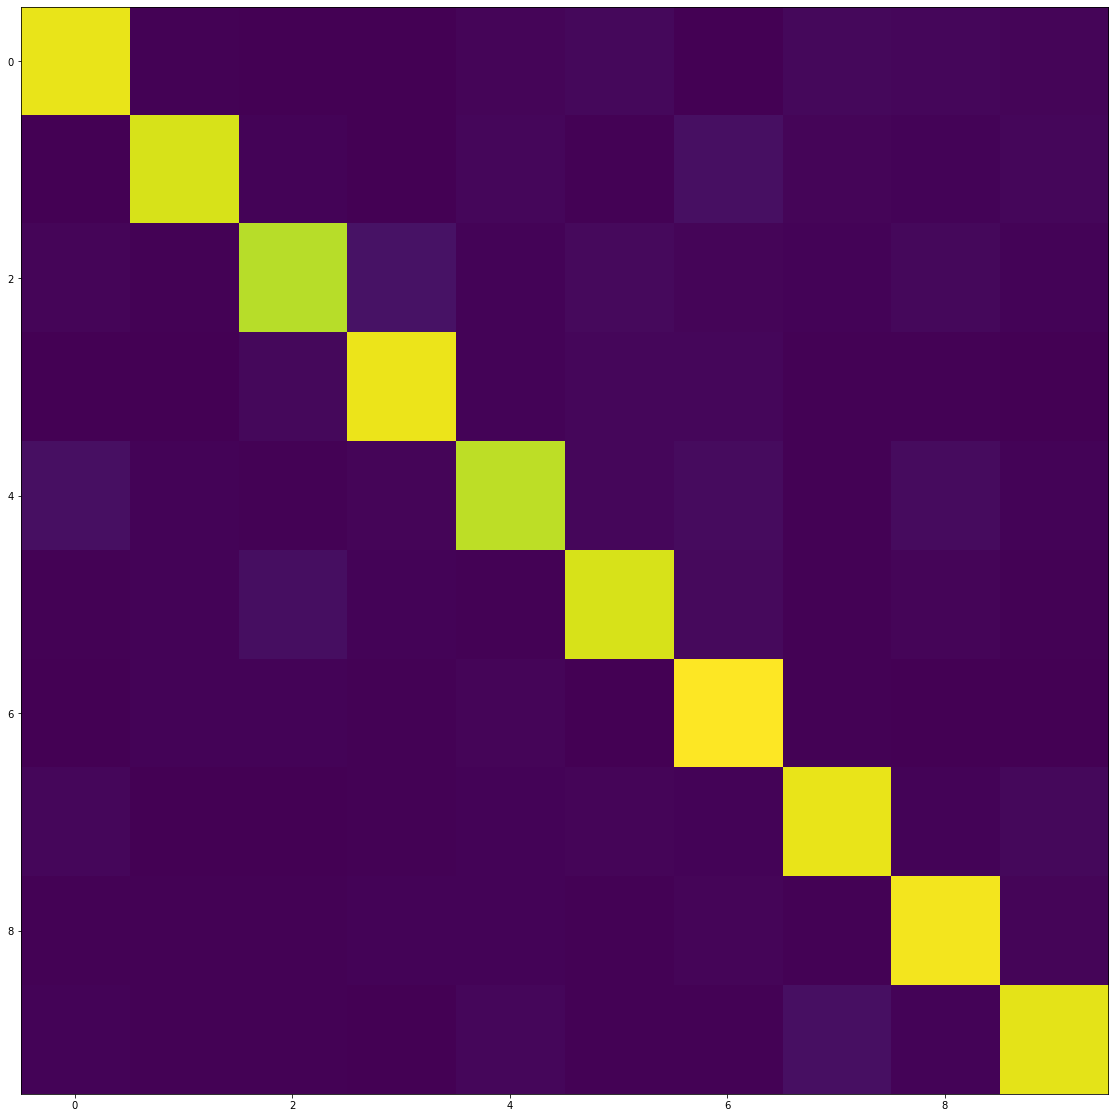

In [309]:
plt.figure(figsize=(20,20))
plt.imshow(confusion_matrix(test_y,predictions))

# Q4

For this question we are going to use Box and Jenkins Airline Passenger Dataset. For this dataset, please install the `rdatasets` library:

In [310]:
#!pip install rdatasets
from rdatasets import data

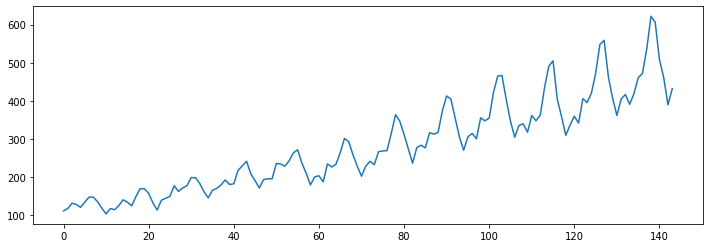

In [68]:
airline = data('AirPassengers')

plt.figure(figsize=(12,4))
airline['value'].plot()

In [73]:
train = airline['value'][:122].values.reshape(122,1)
test = airline['value'][120:].values.reshape(24,1)

Construct

- recurrent 
- LSTM

netural network models on the train set (the first 122 values), and then test it on the last 24 values.

# Scaling 

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [76]:
train_sc = scaler.transform(train)
test_sc = scaler.transform(test)

In [114]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Let's redefine to get 12 months back and then predict the next month out
length = 12
generator = TimeseriesGenerator(train_sc, train_sc, length=length, batch_size=1)

In [115]:
from tensorflow.keras.layers import LSTM

In [116]:
# define model
model_rnn = Sequential()
model_rnn.add(LSTM(100, activation='relu', input_shape=(length, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

In [117]:
validation_generator = TimeseriesGenerator(test_sc,test_sc, length=length, batch_size=1)

In [118]:
# fit model
model_rnn.fit_generator(generator,epochs=20,
                    validation_data=validation_generator)

W0516 00:29:52.099176  5132 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0516 00:29:52.139054  5132 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 110 steps, validate for 12 steps
Epoch 1/20
110/110 [==============================] - 2s 19ms/step - loss: 0.0312 - val_loss: 0.0375
Epoch 2/20
110/110 [==============================] - 1s 7ms/step - loss: 0.0152 - val_loss: 0.0434
Epoch 3/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0123 - val_loss: 0.0694
Epoch 4/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0148 - val_loss: 0.0426
Epoch 5/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0107 - val_loss: 0.0223
Epoch 6/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0092 - val_loss: 0.0187
Epoch 7/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0083 - val_loss: 0.0475
Epoch 8/20
110/110 [==============================] - 1s 6ms/step - loss: 0.0089 - val_loss: 0.0096
Epoch 9/20
110/110 [==============================] - 1s 7ms/step - loss: 0.0066 - val_loss: 0.0077
Epoch 10/20
110/110 [==============================] - 1

In [119]:
losses = pd.DataFrame(model_rnn.history.history)

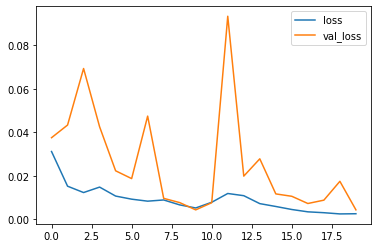

In [120]:
losses.plot()

# Evaluation 

In [133]:
test_predictions = []

first_eval_batch = test_sc[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_rnn.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [134]:
true_predictions = scaler.inverse_transform(test_predictions)

In [135]:
true_predictions.shape

(24, 1)

In [136]:
test_pred = np.concatenate((test,true_predictions),axis=1)

In [137]:
test_pr = pd.DataFrame(test_pred,columns=['Test Data','Predictions'])

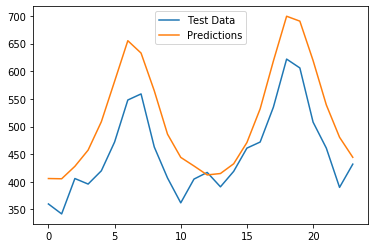

In [138]:
test_pr.plot()

Finally We can obtain the nearly same shape and values with RNN model.